In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
table_2 = pd.read_csv('2_column.csv')
table_3 = pd.read_csv('3_column.csv')

In [4]:
class Klobczak:
    def __init__(self, A=100, table=None, el_c=None):
        self.A = A
        self.table = table
        self.el_c = el_c


    def split(self, table):
        split_axis = self.find_split_axis(table)
        element_count = table.A.count()

        if(element_count> 10000):
            median = np.median(table[split_axis])
            split_table1 = table[table[split_axis] > median]
            split_table2 = table[table[split_axis] <= median]
            ############################
            self.A -= 1
            if(self.A==0):
                self.table = split_table1
                self.el_c = element_count
            #############################
            self.split(split_table1)
            self.split(split_table2)


    def find_split_axis(self, table):
        greatest_variance = 0
        for col in table.columns:
            variance = table[col].var()
            if(variance > greatest_variance): 
                greatest_variance = variance
                split_axis = col
        return split_axis

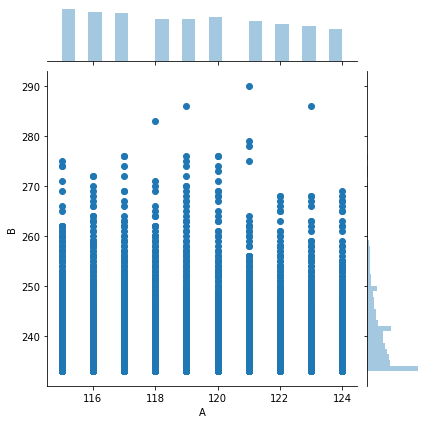

In [13]:
k2 = Klobczak(10, table_2)
k2.split(table_2)
k2.el_c
sns.jointplot(x='A', y='B', data=k2.table)

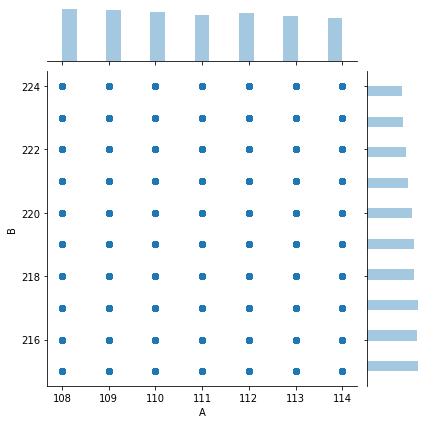

In [6]:
k2 = Klobczak(16, table_2)
k2.split(table_2)
k2.el_c
sns.jointplot(x='A', y='B', data=k2.table)